In [73]:
#!/usr/bin/env python

import click
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt


class Steganography:

    @staticmethod
    def __int_to_bin(rgb):
        """Convert an integer tuple to a binary (string) tuple.
        :param rgb: An integer tuple (e.g. (220, 110, 96))
        :return: A string tuple (e.g. ("00101010", "11101011", "00010110"))
        """
        r, g, b = rgb
        return (f'{r:08b}',
                f'{g:08b}',
                f'{b:08b}')

    @staticmethod
    def __bin_to_int(rgb):
        """Convert a binary (string) tuple to an integer tuple.
        :param rgb: A string tuple (e.g. ("00101010", "11101011", "00010110"))
        :return: Return an int tuple (e.g. (220, 110, 96))
        """
        r, g, b = rgb
        return (int(r, 2),
                int(g, 2),
                int(b, 2))

    @staticmethod
    def __merge_rgb(rgb1, rgb2):
        """Merge two RGB tuples.
        :param rgb1: A string tuple (e.g. ("00101010", "11101011", "00010110"))
        :param rgb2: Another string tuple
        (e.g. ("00101010", "11101011", "00010110"))
        :return: An integer tuple with the two RGB values merged.
        """
        r1, g1, b1 = rgb1
        r2, g2, b2 = rgb2
        rgb = (r1[:4] + r2[:4],
               g1[:4] + g2[:4],
               b1[:4] + b2[:4])
        return rgb

    @staticmethod
    def merge(img1, img2):
        """Merge two images. The second one will be merged into the first one.
        :param img1: First image
        :param img2: Second image
        :return: A new merged image.
        """

        # Check the images dimensions
        if img2.size[0] > img1.size[0] or img2.size[1] > img1.size[1]:
            raise ValueError('Image 2 should not be larger than Image 1!')

        # Get the pixel map of the two images
        pixel_map1 = img1.load()
        pixel_map2 = img2.load()

        # Create a new image that will be outputted
        new_image = Image.new(img1.mode, img1.size)
        pixels_new = new_image.load()

        for i in range(img1.size[0]):
            for j in range(img1.size[1]):
                rgb1 = Steganography.__int_to_bin(pixel_map1[i, j])

                # Use a black pixel as default
                rgb2 = Steganography.__int_to_bin((0, 0, 0))

                # Check if the pixel map position is valid for the second image
                if i < img2.size[0] and j < img2.size[1]:
                    rgb2 = Steganography.__int_to_bin(pixel_map2[i, j])

                # Merge the two pixels and convert it to a integer tuple
                rgb = Steganography.__merge_rgb(rgb1, rgb2)

                pixels_new[i, j] = Steganography.__bin_to_int(rgb)

        return new_image

    @staticmethod
    def unmerge(img):
        """Unmerge an image.
        :param img: The input image.
        :return: The unmerged/extracted image.
        """

        # Load the pixel map
        pixel_map = img.load()

        # Create the new image and load the pixel map
        new_image = Image.new(img.mode, img.size)
        pixels_new = new_image.load()

        # Tuple used to store the image original size
        original_size = img.size

        for i in range(img.size[0]):
            for j in range(img.size[1]):
                # Get the RGB (as a string tuple) from the current pixel
                r, g, b = Steganography.__int_to_bin(pixel_map[i, j])

                # Extract the last 4 bits (corresponding to the hidden image)
                # Concatenate 4 zero bits because we are working with 8 bit
                rgb = (r[4:] + '0000',
                       g[4:] + '0000',
                       b[4:] + '0000')

                # Convert it to an integer tuple
                pixels_new[i, j] = Steganography.__bin_to_int(rgb)

                # If this is a 'valid' position, store it
                # as the last valid position
                if pixels_new[i, j] != (0, 0, 0):
                    original_size = (i + 1, j + 1)

        # Crop the image based on the 'valid' pixels
        new_image = new_image.crop((0, 0, original_size[0], original_size[1]))

        return new_image




Text(0.5, 1.0, 'Secret Image')

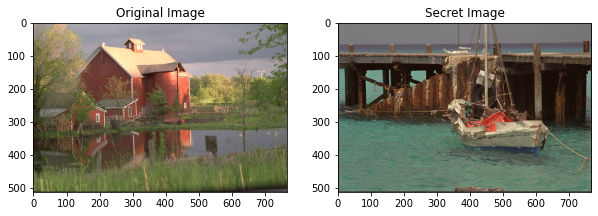

In [76]:
fig = plt.figure(figsize=(10,10))
image_dir = "~/Desktop/Math 110B/final project/testpic"
image1_path,image2_path = np.random.choice(os.listdir(os.path.expanduser(image_dir)), 2, replace=False)
image1 = Image.open(os.path.expanduser(os.path.join(image_dir, image1_path)))
image2 = Image.open(os.path.expanduser(os.path.join(image_dir, image2_path)))
fig.add_subplot(1,2,1)
plt.imshow(image1)
plt.title('Original Image')
fig.add_subplot(1,2,2)
plt.imshow(image2)
plt.title('Secret Image')


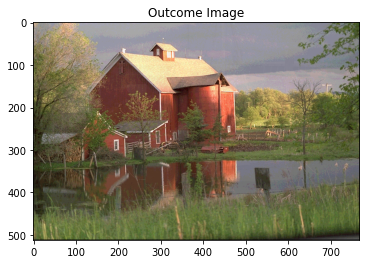

In [77]:
image_merge = Steganography.merge(image1, image2)
plt.imshow(image_merge)
plt.title('Outcome Image')
plt.show()

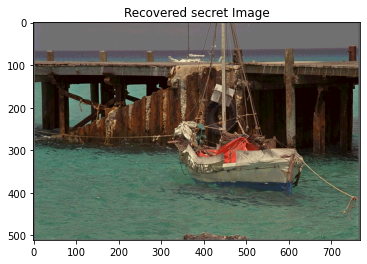

In [78]:
image_unmerge = Steganography.unmerge(image_merge)
plt.imshow(image_unmerge)
plt.title('Recovered secret Image')
plt.show()